In [1]:
import sys
molgen_path = "../"
if molgen_path not in sys.path:
    sys.path.insert(0, molgen_path)

In [2]:
from rdkit import Chem
from rdkit.Chem import Mol
from rdkit.Chem import inchi
from rdkit.Chem import Draw, rdDepictor
from IPython.display import display

def is_same_mol(mol1: Mol, mol2: Mol, options=None):
    inchi1 = inchi.MolToInchiKey(mol1, options)
    inchi2 = inchi.MolToInchiKey(mol2, options)
    return inchi1 == inchi2

def print_atoms_and_labels(mol: Mol):
    for a in mol.GetAtoms():
        text = a.GetSymbol() + ", MapNum: " + str(a.GetAtomMapNum())
        if a.HasProp('atomLabel'):
            text += ", label: " + a.GetProp("atomLabel")
        print(text)

def draw_mol(mol: Mol, width, height, all_prop=False):
    if all_prop:
        for a in mol.GetAtoms():
            if a.HasProp("atomLabel"):
                label = a.GetProp("atomLabel")
                label += "_" + a.GetProp("polymerName")
                label += "_" + a.GetProp("monomerIndex")
                a.SetProp("atomLabel", label)

    rdDepictor.SetPreferCoordGen(True)
    rdDepictor.Compute2DCoords(mol, clearConfs=True)
    display(Draw.MolToImage(mol, size = (width, height)))

In [42]:
%load_ext autoreload
%autoreload 2
from utils import MonomersLib, HELMConverter

monomers_lib_path = molgen_path + "data/helm/library/chembl_35_monomer_library.xml"
lib = MonomersLib.load(monomers_lib_path)
converter = HELMConverter(lib)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[03:38:45] WARNING: not removing hydrogen atom with dummy atom neighbors
[03:38:45] WARNING: not removing hydrogen atom with dummy atom neighbors


b


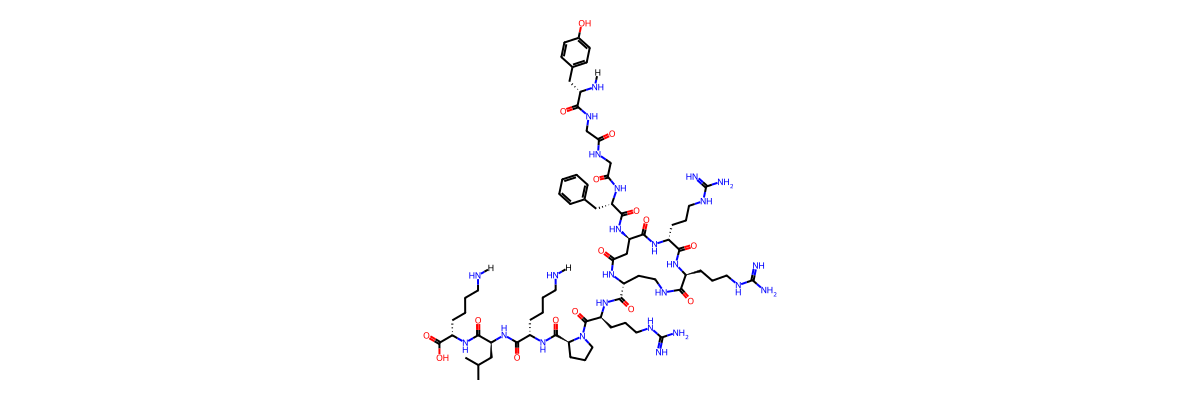

In [43]:
# helm = "PEPTIDE1{K.F.Y.C.N.G.K.R.V.C.V.C.R.[am]}$$$$"
# helm = "PEPTIDE1{[ac].Y.[dC].[dD].[dP].[dC]}$PEPTIDE1,PEPTIDE1,6:R3-3:R3$$$"
# helm = "PEPTIDE1{[dC].[dS].N.[dL].S.[dalloT].[dC].V.L.S.A.Y.W.R.N.L.N.N.F.H.R.F.S.G.M.G.F.G.[dP].Q.T.P}$PEPTIDE1,PEPTIDE1,7:R3-1:R3$$$"
# helm = "PEPTIDE1{[dP].G}|PEPTIDE2{Y.[dOrn].[1-Nal]}$PEPTIDE2,PEPTIDE1,3:R2-1:R1|PEPTIDE2,PEPTIDE1,2:R3-2:R2$$$"
# helm = "PEPTIDE1{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}|PEPTIDE2{S.C.R.L.Y.E.L.L.H.G.A.G.N.H.A.A.G.I.L.T.L}$PEPTIDE2,PEPTIDE1,2:R3-2:R3$$$"
helm = "PEPTIDE1{Y.G.G.F.[dD]}|PEPTIDE2{[dR].R}|PEPTIDE3{[dDab].R.P.K.L.K}$PEPTIDE3,PEPTIDE2,1:R3-2:R2|PEPTIDE1,PEPTIDE2,5:R2-1:R1|PEPTIDE1,PEPTIDE3,5:R3-1:R1$$$"

mol = converter._convert(helm, verbose=True)
draw_mol(mol, 1200, 400)

b
True


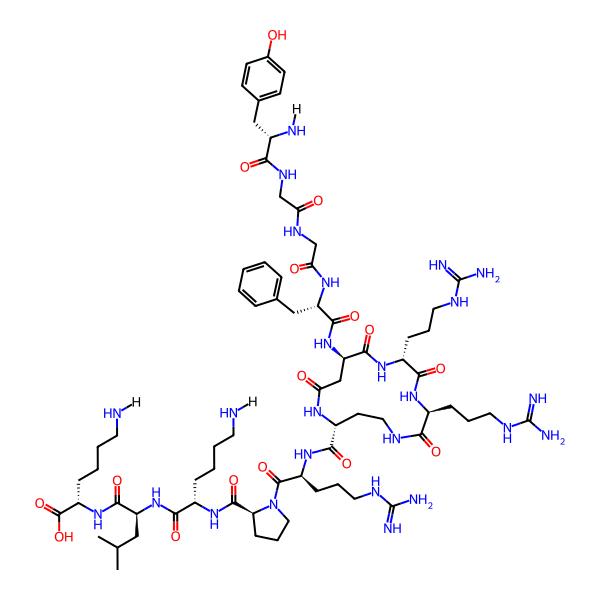

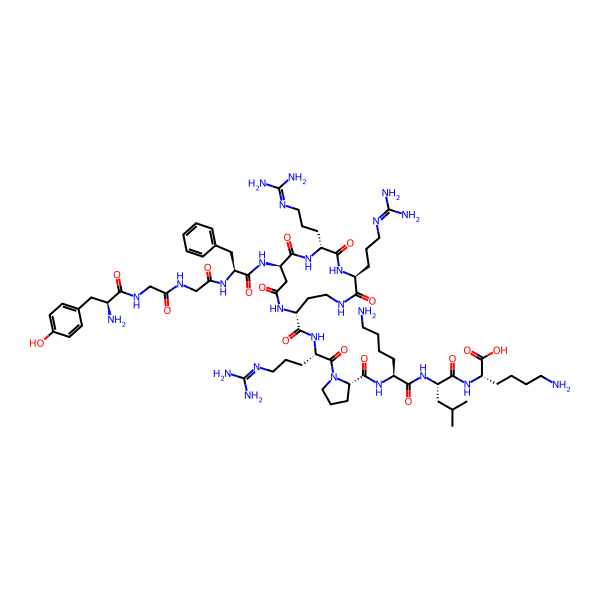

In [44]:
helm = "PEPTIDE1{Y.G.G.F.[dD]}|PEPTIDE2{[dR].R}|PEPTIDE3{[dDab].R.P.K.L.K}$PEPTIDE3,PEPTIDE2,1:R3-2:R2|PEPTIDE1,PEPTIDE2,5:R2-1:R1|PEPTIDE1,PEPTIDE3,5:R3-1:R1$$$"
smiles = "CC(C)C[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H]1CCNC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H](CCCN=C(N)N)NC(=O)[C@H](NC(=O)[C@H](Cc2ccccc2)NC(=O)CNC(=O)CNC(=O)[C@@H](N)Cc2ccc(O)cc2)CC(=O)N1)C(=O)N[C@@H](CCCCN)C(=O)O"

mol_helm = converter.convert(helm)
mol_smiles = Chem.MolFromSmiles(smiles)

width = 600
height = 600

print(is_same_mol(mol_helm, mol_smiles))
draw_mol(mol_helm, width, height)
draw_mol(mol_smiles, width, height)